<a href="https://colab.research.google.com/github/Praneetb2929/AiMl-ElevateLab-1/blob/main/Task_8_Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load & View Dataset**

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")   # change filename if needed

print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

# **Select Features for Clustering**

In [2]:
# Mall dataset common useful features:
# Annual Income
# Spending Score

In [3]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# **Normalize Features**

In [4]:
# K-Means works best when data is normalized.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Elbow Method (Find Best K)**

In [8]:
import matplotlib.pyplot as plt

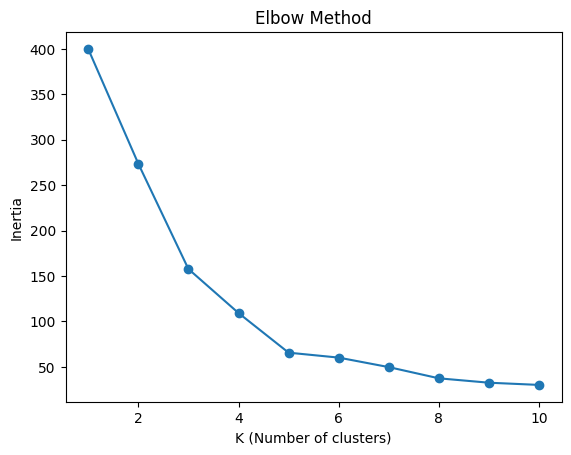

In [9]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("K (Number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Look for the "bend" — usually K = 4 or K = 5.

# **Fit Final K-Means**

Example using K = 5 (choose based on elbow curve):

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# **Silhouette Score**

## Higher = better (ideal range 0.4–0.7)

In [12]:
from sklearn.metrics import silhouette_score


sil = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil)

Silhouette Score: 0.5546571631111091


# **Visualize Clusters (2D)**

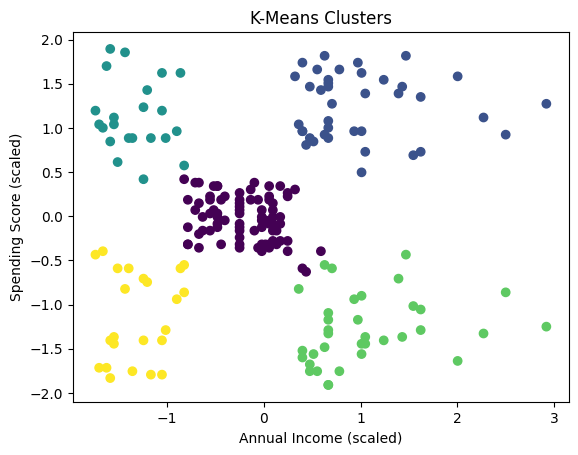

In [13]:
from sklearn.decomposition import PCA

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="viridis")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clusters")
plt.show()